In [15]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [16]:
df = pd.read_csv("../scraper/arxiv_physics_2025-07-02_16-53-00.csv")

In [17]:
target_categories = ["hep-th", "hep-ph", "gr-qc"]
X = df['abstract']
y = df['primary_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

In [18]:
vectorizer = TfidfVectorizer(
    max_features=10000,  
    ngram_range=(1, 2), 
    stop_words='english'
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [19]:
svm_clf = LinearSVC(class_weight='balanced', max_iter=5000, random_state=42)
svm_clf.fit(X_train_tfidf, y_train)

LinearSVC(class_weight='balanced', max_iter=5000, random_state=42)

In [20]:
y_pred = svm_clf.predict(X_test_tfidf)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

       gr-qc       0.82      0.89      0.85        97
      hep-ph       0.96      0.91      0.93       117
      hep-th       0.81      0.79      0.80        89

    accuracy                           0.87       303
   macro avg       0.86      0.86      0.86       303
weighted avg       0.87      0.87      0.87       303



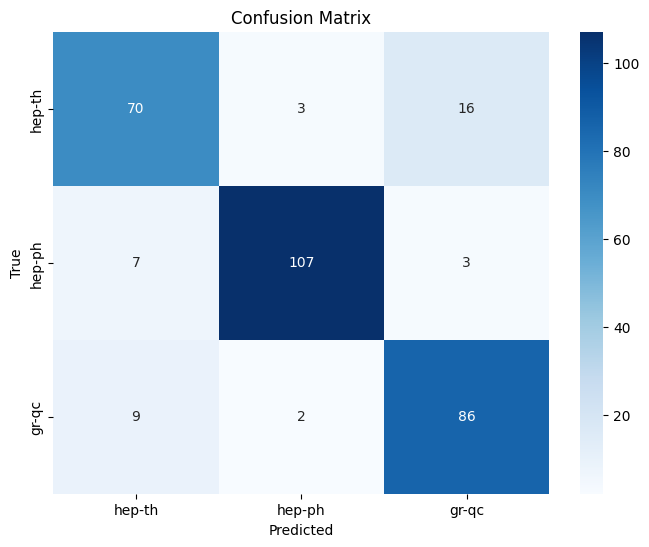

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=target_categories)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_categories, yticklabels=target_categories, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
def show_top_features_per_class(vectorizer, svm_clf, categories, top_n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        coef = svm_clf.coef_[i]
        top_positive_idx = np.argsort(coef)[-top_n:]
        top_negative_idx = np.argsort(coef)[:top_n]

        print(f"\nCategory: {category}")
        print(f"Top {top_n} positive features:")
        print(feature_names[top_positive_idx][::-1])

        print(f"Top {top_n} negative features:")
        print(feature_names[top_negative_idx])

In [23]:
show_top_features_per_class(vectorizer, svm_clf, target_categories, top_n=15)


Category: hep-th
Top 15 positive features:
['gravitational' 'einstein' 'relativity' 'gravity' 'black' 'hole'
 'universe' 'metric' 'black hole' 'general relativity' 'parameters'
 'spacetime' 'stars' 'schwarzschild' 'parameter']
Top 15 negative features:
['holographic' 'neutrino' 'decay' 'gauge' 'scattering' 'ads' 'primordial'
 'heavy' 'primordial black' 'loop' 'dimensional' 'qcd' 'cft' 'amplitudes'
 'group']

Category: hep-ph
Top 15 positive features:
['neutrino' 'quark' 'qcd' 'flavor' 'bar' 'production' 'standard model'
 'meson' 'mass' 'higgs' 'physics' 'dm' 'experiments' 'primordial black'
 'decay']
Top 15 negative features:
['gravity' 'gravitational' 'theory' 'black' 'hole' 'black hole' 'theories'
 'point' 'field' 'horizon' 'equations' 'massive' 'spacetime' 'boundary'
 'stars']

Category: gr-qc
Top 15 positive features:
['holographic' 'theory' 'ads' 'point' 'boundary' 'cft' 'dual'
 'field theories' 'group' 'dimensional' 'bootstrap' 'mathbb' 'string'
 'moduli' 'algebra']
Top 15 negat

In [24]:
def plot_wordcloud_for_class(vectorizer, clf, category_index, category_name, max_words=100):
    feature_names = np.array(vectorizer.get_feature_names_out())
    coef = clf.coef_[category_index]

    word_weights = {feature_names[i]: coef[i] for i in range(len(coef)) if coef[i] > 0}

    wc = WordCloud(width=800, height=400, background_color='white', max_words=max_words)
    wc.generate_from_frequencies(word_weights)

    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud for category: {category_name}", fontsize=16)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

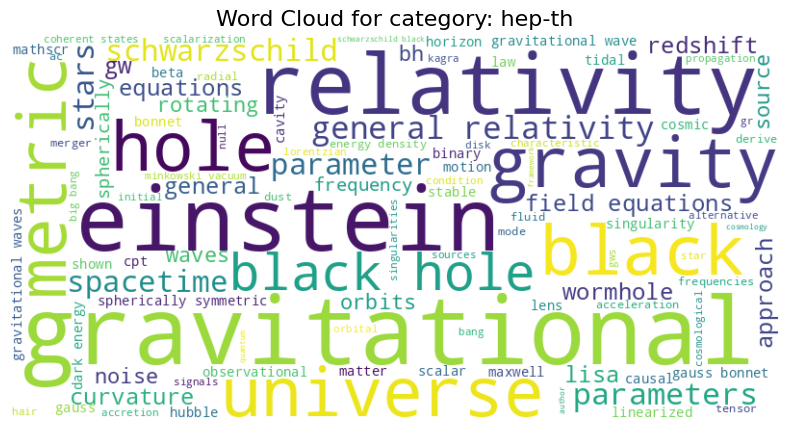

In [25]:
plot_wordcloud_for_class(vectorizer, svm_clf, 0, target_categories[0])